<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/SOS_EOS_adv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

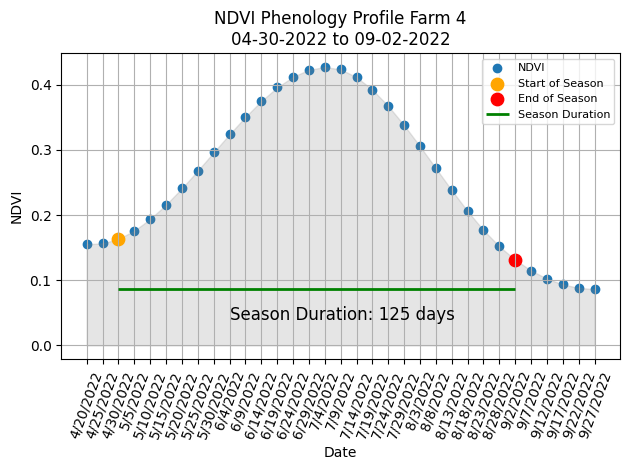

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd


# # Define the data points as arrays (same as in the previous example)
# dates = ["3/22/2019", "3/27/2019", "4/1/2019", "4/6/2019", "4/11/2019", "4/16/2019", "4/21/2019", "4/26/2019",
#          "5/1/2019", "5/6/2019", "5/11/2019", "5/16/2019", "5/21/2019", "5/26/2019", "5/31/2019", "6/5/2019",
#          "6/10/2019", "6/15/2019", "6/20/2019", "6/25/2019", "6/30/2019", "7/5/2019", "7/10/2019", "7/15/2019",
#          "7/20/2019", "7/25/2019", "7/30/2019", "8/4/2019", "8/9/2019", "8/14/2019", "8/19/2019", "8/24/2019",
#          "8/29/2019", "9/3/2019", "9/8/2019", "9/13/2019", "9/18/2019", "9/23/2019", "9/28/2019"]
# values = [0.281380591, 0.287602726, 0.299299509, 0.31441601, 0.331162388, 0.348809159, 0.366891929, 0.384946305,
#           0.40245252, 0.418669328, 0.43280011, 0.44404825, 0.451617129, 0.45471013, 0.452530635, 0.444282026,
#           0.429602879, 0.409872548, 0.386774254, 0.36146592, 0.334974142, 0.308250355, 0.281945353, 0.256634769,
#           0.232894234, 0.211299383, 0.192425846, 0.17669418, 0.163904626, 0.153702351, 0.145732521, 0.139640299,
#           0.135070852, 0.131669344, 0.129080942, 0.12695081, 0.125007236, 0.123310994, 0.122005983]


######
# Load data from a CSV file
data = pd.read_csv('/content/second_season_farm4.csv')

# Extract dates and values from the DataFrame
dates = data['Date'].tolist()
values = data['NDVI'].tolist()
########

# Calculate the total area under the curve
total_area = np.trapz(values, dx=1)

# Calculate the target areas (5% and 95% of the total area)
target_area_5_percent = 0.05 * total_area
target_area_95_percent = 0.95 * total_area

# Initialize variables to keep track of accumulated area
accumulated_area = 0
beginning_point = None
ending_point = None

# Iterate through the data points to find the desired points
for i in range(len(dates)):
    accumulated_area += values[i]
    if accumulated_area >= target_area_5_percent and beginning_point is None:
        beginning_point = (dates[i], values[i])
    if accumulated_area >= target_area_95_percent:
        ending_point = (dates[i], values[i])
        break

date1 = datetime.strptime(beginning_point[0], "%m/%d/%Y")
date2 = datetime.strptime(ending_point[0], "%m/%d/%Y")

# Calculate the duration of the season
season_duration = date2 - date1
season_duration = season_duration.days
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the curve
ax.scatter(dates, values, label="NDVI")

####
# Highlight the area under the curve
ax.fill_between(dates, 0, values, where=[True] * len(dates), color='gray', alpha=0.2)

# Highlight the beginning and ending points
ax.scatter(beginning_point[0], beginning_point[1], color='orange', label="Start of Season",s=80)
ax.scatter(ending_point[0], ending_point[1], color='red', label="End of Season",s=80)

# Season Duration highlighted Text
plt.text(9, min(values)-0.04, f"Season Duration: {season_duration} days", fontsize=12, va='center')

# Add a horizontal line to highlight the seasonal duration
ax.hlines(y=min(values), xmin=beginning_point[0], xmax=ending_point[0], color='green', linewidth=2, label='Season Duration')

# Attempt to highligth the seasonal period
# plt.annotate('local max', xy=(0.3, -5.5), xytext=(3, 1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("NDVI")
ax.set_title("NDVI Phenology Profile")
ax.set_title(f"NDVI Phenology Profile Farm 4\n{date1.strftime('%m-%d-%Y')} to {date2.strftime('%m-%d-%Y')}")
# Rotate x-axis labels for better readability
plt.xticks(rotation=70)

# Add a legend
ax.legend(prop={"size": 8},loc="upper right")

plt.grid()
plt.tight_layout()
plt.show()